<a href="https://colab.research.google.com/github/danishrahman96/MECE4520/blob/main/Data_Science_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MECE 4520 Homework #4

Danish Rahman (dr3244)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen
from sklearn.preprocessing import StandardScaler

Loading the Image

In [ ]:
image_data = Image.open(urlopen('https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/leena.png'))
X = np.array(image_data)

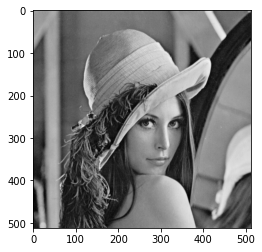

In [ ]:
plt.figure()
plt.imshow(image_data,cmap="gray")
plt.show

### Problem 1: Part 1

In [ ]:
X1 = X[128,128]

print(f"The value of the element at X [128,128] is: {X1}")

The value of the element at X [128,128] is: 173


### Problem 1: Part 2

In [ ]:
# To perform standardization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X1_scaled = X_scaled[128,128]
print(f"The value of the element of the standardized matrix X_scanled and X_scaled [128,128] is: {X1_scaled}")

The value of the element of the standardized matrix X_scanled and X_scaled [128,128] is: 1.2794041765058435


### Problem 1: Part 3

In [ ]:
#Using the numpy linear algebra solver for Singular Value Decomposition

U, S, Vh = np.linalg.svd(X_scaled.T @ X_scaled /len(X_scaled))
U_red = U[:,0]
print(f"The first element of the principal component U is: {U_red[0]}")

The first element of the principal component U is: -0.05842033740661645


### Problem 1: Part 4

In [ ]:
# calculate reconstruction error
all_errors = []
for k in range(51):
    U_reduced = U[:, :k]
    Z = X_scaled @ U_reduced
    X_approx = Z @ U_reduced.T
    error = (
        np.sum(np.square(np.linalg.norm((X_scaled - X_approx), ord=2, axis=1))) 
        / np.sum(np.square(np.linalg.norm(X_scaled, ord=2, axis=1)))
    )
    all_errors.append(error)

print(f"The reconstruction error for the first 50 principal components of X_scaled is {all_errors[-1]}")

The reconstruction error for the first 50 principal components of X_scaled is 0.046444313764157766


In [ ]:
%%shell
jupyter nbconvert --to html ///content/Data_Science_HW_4.ipynb

[NbConvertApp] Converting notebook ///content/Data_Science_HW_4.ipynb to html
[NbConvertApp] Writing 363468 bytes to ///content/Data_Science_HW_4.html
